In [2]:
from cs103 import *

## Module 3 recap

Picking the right data type requires practice. Let's see how you do with these:
- The colors of the rainbow
- The colors of a sweater
- Names for pet cats
- Names of players in a soccer team
- Red cell count in a patient

Vote here (we'll do it one by one): https://www.menti.com/8t7gcosgm7

## Module 4: Information Composed of Many Pieces and Compound Data 

Sometimes, the information to be represented has two or more values that naturally belong together:
- First name, last name, and student ID of a student
- Title, artist, album and duration of a song
- Title, year, and director of a movie
- …

Compound data offers a way to handle that!

### Example

In [3]:
from typing import NamedTuple 
CartesianCoord = NamedTuple('CartesianCoord', [('x', float), 
                                               ('y', float)])  

# interp. Cartesian coordinate in a two-dimensional plane 

CC_ORIG = CartesianCoord(0, 0)
CC1 = CartesianCoord(2, 5.5)
CC2 = CartesianCoord(-1.2, -4.4)

# template based on Compound 
@typecheck 
def fn_for_cartesian_coord(cc: CartesianCoord) -> ...: 
    return ...(cc.x, cc.y)

### Exercise 1a: function for CartesianCoord

Design a function that takes a CartesianCoord variable and computes its distance from the origin (0,0).

The distance from the origin can be computed using Pythagora's theorem: d^2 = x^2 + y^2

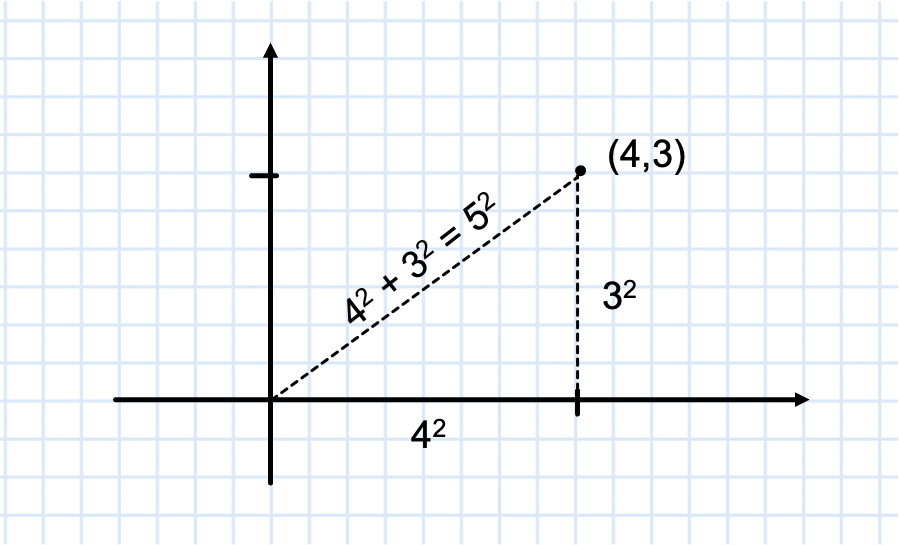

In [5]:
# Hint: Pythagoras to the rescue
from math import *

# Some of you may have considered this solution: def distance_from_origin(x: float, y: float) -> float: 
# However, this does not take advantage of having a compound variable, which allows us to move and
# use a pair of coordinates as a single unit (better, since they belong together).

@typecheck
def distance_from_origin(cc: CartesianCoord) -> float: 
    """
    Given a CartesianCoord variable, computes its distance from the origin (0,0)
    """
    # return -1 # stub
    # Template from CartesianCoord
    return sqrt(cc.x * cc.x + cc.y * cc.y) 

start_testing()

# Make sure to test all cominations of signs, and numbers with decimals
expect(distance_from_origin(CC_ORIG), 0)
expect(distance_from_origin(CartesianCoord(3,4)), 5)
expect(distance_from_origin(CartesianCoord(3,-4)), 5)
expect(distance_from_origin(CartesianCoord(-3,-4)), 5)
expect(distance_from_origin(CartesianCoord(-3,4)), 5)
expect(distance_from_origin(CartesianCoord(1.5,-2)), 2.5)

summary()

6 of 6 tests passed


### Exercise 1b: function for CartesianCoord

Design a function that takes a CartesianCoord variable and returns the corresponding quadrant.

In [6]:
@typecheck
def quadrant(cc: CartesianCoord) -> int:
    """
    Returns the corresponding quadrant of a Cartesian Coordinate (assuming 0 as positive)
    """
    # return -1  # stub
    # template from CartesianCoord
    # We significantly added to the original template, and that's ok!
    # The template for compound only suggests, as a starting point, that all fields are available to use
    if cc.x >= 0:
        if cc.y >=0:
            return 1
        else:
            return 4
    elif cc.x < 0:
        if cc.y < 0:
            return 3
        else:
            return 2
        

start_testing()

# For this solution, we decided to assign points on the axis to a quadrant.
# Below you can find a different solution that solves this problem.
expect(quadrant(CartesianCoord(3,4)), 1)
expect(quadrant(CartesianCoord(-3,4)), 2)
expect(quadrant(CartesianCoord(-3,-4)), 3)
expect(quadrant(CartesianCoord(3,-4)), 4)
expect(quadrant(CC_ORIG), 1)
expect(quadrant(CartesianCoord(0,3.5)), 1)
expect(quadrant(CartesianCoord(0,-3.5)), 4)
expect(quadrant(CartesianCoord(-3.5,0)), 2)
expect(quadrant(CartesianCoord(3.5,0)), 1)

summary()

9 of 9 tests passed


## Post-lecture notes

If you like, you can change the quadrant function to return Enum instead of integer. This way, we are sure to return only one of the 4 valid values. We need to create that data type though!

In [7]:
from enum import Enum

Quadrant = Enum('Quadrant', ['I', 'II', 'III', 'IV'])
# interpr. a quadrant in the 2D Cartesian plane

# Examples are redundant for enumeration

@typecheck
# Template based on Enumeration(4 cases)
def fn_for_quadrant(q: Quadrant) -> ...:
    if q == Quadrant.I:
        return ...
    elif q == Quadrant.II:
        return ...
    elif q == Quadrant.III:
        return ...
    elif q == Quadrant.IV:
        return ...

In [9]:
@typecheck
def quadrant_enum(cc: CartesianCoord) -> Quadrant:
    """
    Given a CartesianCoord variable, it returns the corresponding Quadrant. A coordinate of 0 is assumed positive.
    """
    # return Quadrant.I   # stub
    #Template from CartesianCoord   # Notice that the template is still from CartesianCoord, the parameter!
    if cc.x >= 0 and cc.y >= 0:
         return Quadrant.I
    elif cc.x < 0 and cc.y >= 0:
         return Quadrant.II
    elif cc.x < 0 and cc.y < 0:
         return Quadrant.III
    else:
        return Quadrant.IV

start_testing()

expect(quadrant_enum(CC_ORIG), Quadrant.I)
expect(quadrant_enum(CartesianCoord(1,1)), Quadrant.I)
expect(quadrant_enum(CartesianCoord(-1,1)), Quadrant.II)
expect(quadrant_enum(CartesianCoord(-1,-1)), Quadrant.III)
expect(quadrant_enum(CartesianCoord(1,-1)), Quadrant.IV)
expect(quadrant_enum(CartesianCoord(0,3.5)), Quadrant.I)
expect(quadrant_enum(CartesianCoord(0,-3.5)), Quadrant.IV)
expect(quadrant_enum(CartesianCoord(-3.5,0)), Quadrant.II)
expect(quadrant_enum(CartesianCoord(3.5,0)), Quadrant.I)

summary()

9 of 9 tests passed


Don't like having to consider 0 positive and assigning it to a quadrant? No problem! We can redesign the function to return Optional instead of int. Then we can use None for coordinates along the axis.

Again, we first have to create a data type for that:

In [10]:
from typing import Optional

QuadrantOpt = Optional[int]  # in range [1,4]
# interpr. One of the 4 quadrants in the 2D Cartesian plane, or None if the coordinate lies
# along one of the axis.

QO_ORIG = None
Q1 = 1
Q2 = 2
Q4 = 4

@typecheck
# Template based on Optional
def fn_for_quadrant_opt(qo: QuadrantOpt) -> ...:
    if qo is None:
        return ...
    else:
        return ...(qo)

In [11]:
@typecheck
def quadrant_opt(cc: CartesianCoord) -> QuadrantOpt:
    """
    Given a CartesianCoord variable, it returns its quadrant or None if the coordinate lies along
    one of the axis.
    """
    # return 0   # stub
    #Template from CartesianCoord   # Once again, the template is based on the parameter, CartesianCoord
    if cc.x > 0 and cc.y > 0:
         return 1
    elif cc.x < 0 and cc.y > 0:
         return 2
    elif cc.x < 0 and cc.y < 0:
         return 3
    elif cc.x > 0 and cc.y < 0:
        return 4
    else:
        return None

start_testing()
expect(quadrant_opt(CC_ORIG), None)
expect(quadrant_opt(CartesianCoord(1,1)), 1)
expect(quadrant_opt(CartesianCoord(-1,1)), 2)
expect(quadrant_opt(CartesianCoord(-1,-1)), 3)
expect(quadrant_opt(CartesianCoord(1,-1)), 4)
expect(quadrant_opt(CartesianCoord(1,0)), None)
expect(quadrant_opt(CartesianCoord(-1,0)), None)
expect(quadrant_opt(CartesianCoord(0,-1)), None)
expect(quadrant_opt(CartesianCoord(0,1)), None)
summary()

9 of 9 tests passed


### Exercise 2: function for two CartesianCoord variables

Design a function that takes two CartesianCoord variables and computes their distance from each other.

### Exercise 3: function that returns a CartesianCoord variable

Design a function that takes two CartesianCoord variables and computes their middle point.

CartesianCoord is a simple coumpund with only 2 fields, but it shows how powerful and flexible compound data can be!

Let's continue our practice by doing Problem 1, 2 and 6 of the worksheet.

### assert

Assume you are working with the following data type:

In [ ]:
Time = int # in range[0, 86400) 
# interp. seconds since midnight 

MIDNIGHT = 0 
ONE_AM = 3600 
MIDDAY = 43200 
END_OF_DAY = 86399

@typecheck 
def fn_for_time(t: Time) -> ...: 
    return ...(t) # template based on Atomic Non-Distinct 


What happens if we use T1 = 99999 in a function using Time as argument? 

...The answer is... **nothing!** Range is just a comment

We assume some information via comments, but how can we make sure the value is correct? 

In [ ]:
T1 = 99999 
assert T1 <= 86400 

```assert``` will generate an error if the expression is False and just let the program keep running normally if the expression is True. You can add it to functions when you want to enforce a range (or another condition) on a variable.

### Bonus Out-of-Class Example, Artist: Compound or Enumeration?

Our artist question asks you to represent "an artist's family name,
given name, birthplace, and art form (e.g., oil painting, sculpture,
dance)".

What does one value of this type look like? Let's use [Georgia O'Keeffe](https://en.wikipedia.org/wiki/Georgia_O'Keeffe)
(the painter, born in Wisconsin) as our example. We'll try solving the
problem first with a compound and then with an enumeration and then
try to represent O'Keeffe.

In [ ]:
# Version 1: compound
from typing import NamedTuple

Artist = NamedTuple('Artist', [('family_name', str),
                               ('given_name', str),
                               ('birthplace', str),
                               ('art_form', str)])
# interp. an artist with their family name, given name, place of birth,
#         and the art form they were best known for.
A_MONET = Artist('Monet', 'Claude', 'Paris', 'pastels')
A_NAOMI = Artist('Wolfman', 'Naomi', 'Vancouver', 'line drawings')

@typecheck
# template based on compound (4 fields)
def fn_for_artist(a: Artist) -> ...:
    return ...(a.family_name,
               a.given_name,
               a.birthplace,
               a.art_form)

# How do we represent Georgia O'Keeffe?
georgia = ...

In [ ]:
# Version 2: enumeration
from enum import Enum

Artist = Enum('Artist', ['family_name', 'given_name', 'birthplace', 'art_form'])
# interp. an aspect of an artist, one of their family name, their given name
# their birthplace, or their art form.
# Examples are redundant for enumerations.


# template based on enumeration (4 cases)
@typecheck
def fn_for_artist(a: Artist) -> ...:
    if a == Artist.family_name:
        return ...
    elif a == Artist.given_name:
        return ...
    elif a == Artist.birthplace:
        return ...
    elif a == Artist.art_form:
        return ...

# How do we represent Georgia O'Keeffe?
georgia = ...

In [ ]:
# Version 3: simple atomic

Artist = str
# interp. an artist with their family name then given name followed by "born in"
# and their birthplace and "known for" and their art form.
A_MONET = 'Monet Claude born in Paris known for pastels'
A_NAOMI = 'Wolfman Naomi born in Vancouver known for line drawings'

@typecheck
# template based on atomic non-distinct
def fn_for_artist(a: Artist) -> ...:
    return ...(a)

# How do we represent Georgia O'Keeffe?
georgia = ...